# LLC Operating Window Simulator

In [8]:
from llc_sim import test_edge_cases
from pathlib import Path

from SEPOC2025.magnetics_and_rectifier import *

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
import numpy as np


# Cores database file location
path = Path.cwd()  / "SEPOC2025\cores_shapes_params.ndjson" 


# Default circuit parameters
params = {
    'Rload': 100,
    'Cs': 6.8e-9,
    'Ls': 165e-6,
    'Lm': 750e-6,
    'n': 39/12,
    'Co': 10e-6,
    'Vbus': 420,
    'fsw': 100000
}

SimCycles = 500    
TimeStep = 10e-9    

# Operating Points
OperatingPoints = {
    '420V/70V@1.5A',
    '420V/160V@0.94A',
    '420V/100V@1.5A'
}

if __name__ == "__main__":
    OperatingPoint = test_edge_cases(OperatingPoints, params, SimCycles, TimeStep, plot = False, show_table=True, tol=1, return_arrays=True) 


<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Joshua\AppData\Local\Temp\ipykernel_22064\3332658080.py:13: SyntaxWarning: invalid escape sequence '\c'
  path = Path.cwd()  / "SEPOC2025\cores_shapes_params.ndjson"



3 cases were successfully processed.

SIMULATION SUMMARY
╒═════════════╤═════════════════╤══════════════════╤═══════════════════╕
│ Parameter   │ 420V/70V@1.5A   │ 420V/100V@1.5A   │ 420V/160V@0.94A   │
╞═════════════╪═════════════════╪══════════════════╪═══════════════════╡
│ Po          │ 105.0 W         │ 150.0 W          │ 150.4 W           │
├─────────────┼─────────────────┼──────────────────┼───────────────────┤
│ VoutAVG     │ 68.0015         │ 100.7208         │ 159.8891          │
├─────────────┼─────────────────┼──────────────────┼───────────────────┤
│ fsw         │ 135.1242 kHz    │ 92.6959 kHz      │ 79.5666 kHz       │
├─────────────┼─────────────────┼──────────────────┼───────────────────┤
│ dt_max      │ 809.0948 ns     │ 693.9794 ns      │ 1564.0437 ns      │
├─────────────┼─────────────────┼──────────────────┼───────────────────┤
│ dt_max(%)   │ 5.4664%         │ 3.2165%          │ 6.2223%           │
├─────────────┼─────────────────┼──────────────────┼──────────────

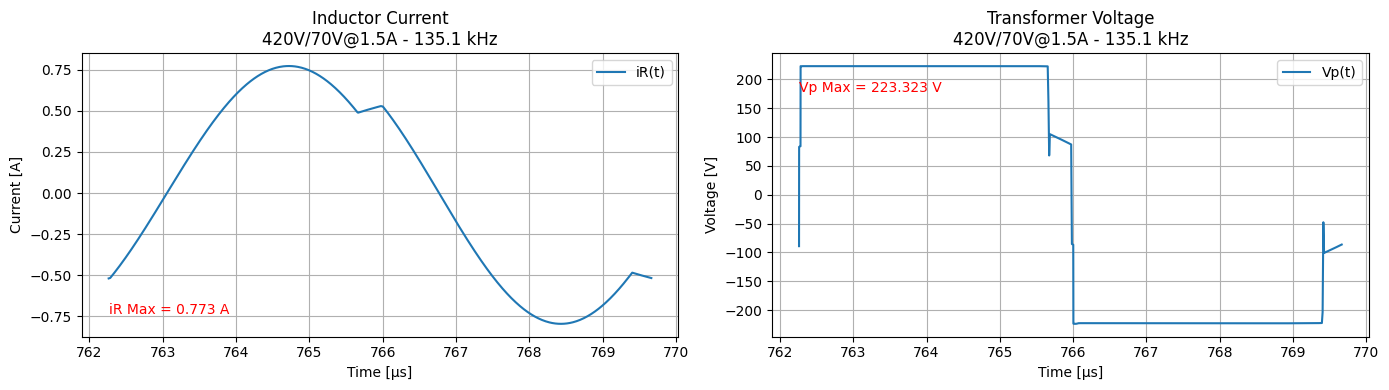

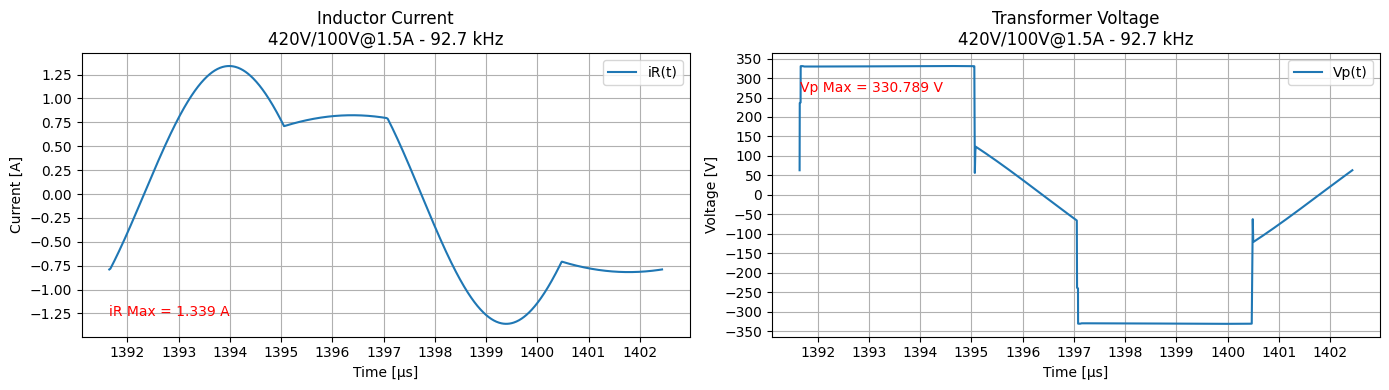

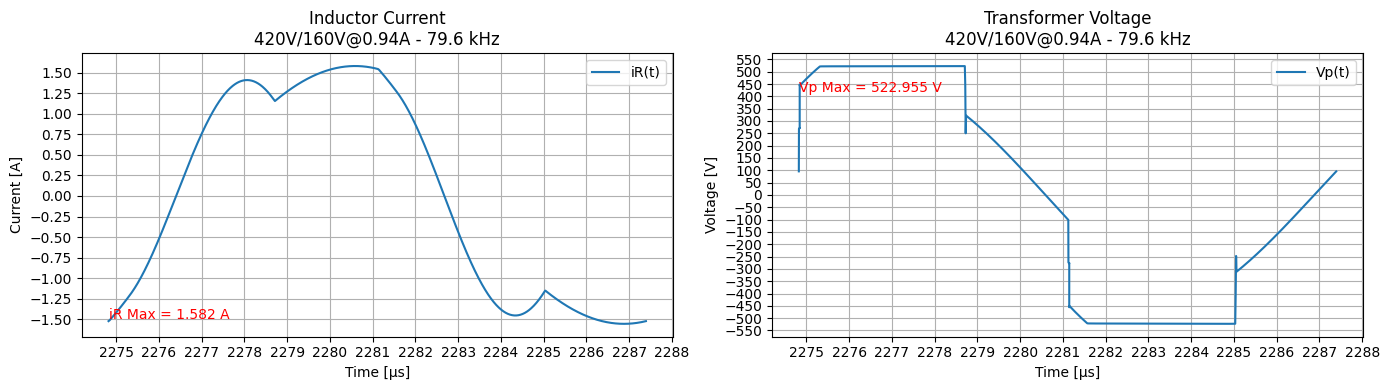

In [9]:
def microsec_formatter(x, pos):
    return f"{x * 1e6:.0f}"

for i, OP in enumerate(OperatingPoint):

    # Último ciclo
    start_idx = np.argmin(np.abs(OP['time'] - (OP['time'][-1] - 1/(OP['fsw_khz']*1e3))))

    PeriodTimeArray = OP['time'][start_idx:]
    
    
    # Corrente do indutor
    InductorCurrentArray = OP['iR'][start_idx:]
    InductorCurrentMax = np.max(InductorCurrentArray)

    # Tensão no primário do transformador
    TransformerVoltageArray = OP['vpri'][start_idx:]
    TransformerVoltageMax = np.max(TransformerVoltageArray)

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # 1 linha, 2 colunas

    # Plot corrente no indutor
    axes[0].plot(PeriodTimeArray, InductorCurrentArray, label="iR(t)")
    axes[0].text(PeriodTimeArray[0], InductorCurrentMax * -0.95, f"iR Max = {InductorCurrentMax:.3f} A", fontsize=10, color="red")
    axes[0].set_title(f"Inductor Current\n{OP['case']} - {OP['fsw_khz']:.1f} kHz")
    axes[0].set_xlabel("Time [μs]")
    axes[0].set_ylabel("Current [A]")
    axes[0].grid(True)
    axes[0].yaxis.set_major_locator(MultipleLocator(0.25))
    axes[0].xaxis.set_major_locator(MultipleLocator(1e-6))
    axes[0].xaxis.set_major_formatter(FuncFormatter(microsec_formatter))
    axes[0].legend()

    # Plot tensão do primário
    axes[1].plot(PeriodTimeArray, TransformerVoltageArray, label="Vp(t)")
    axes[1].text(PeriodTimeArray[0], TransformerVoltageMax * 0.8, f"Vp Max = {TransformerVoltageMax:.3f} V", fontsize=10, color="red")
    axes[1].set_title(f"Transformer Voltage\n{OP['case']} - {OP['fsw_khz']:.1f} kHz")
    axes[1].set_xlabel("Time [μs]")
    axes[1].set_ylabel("Voltage [V]")
    axes[1].grid(True)
    axes[1].yaxis.set_major_locator(MultipleLocator(50))
    axes[1].xaxis.set_major_locator(MultipleLocator(1e-6))
    axes[1].xaxis.set_major_formatter(FuncFormatter(microsec_formatter))
    axes[1].legend()

    plt.tight_layout()
    plt.show()


Cores loaded: 55. Diodes loaded: 38.

                        Designs Comparison
      Parameter Transformer (FW) Transformer (FB)   Inductor
     Core Model         PQ 32/20         PQ 32/20 E 19.3/4.8
       Ae (mm²)            154.2            154.2       22.9
       Ve (mm³)           7670.0           7670.0      914.0
  Primary Turns               39               39         41
Secondary Turns               12               12           
  Pri Litz Wire       36 # 0.1mm       36 # 0.1mm 36 # 0.1mm
  Sec Litz Wire       43 # 0.1mm       60 # 0.1mm           
Window Fill (%)            88.36            80.77      89.37
                                                            
    Diode Model       STTH2L06-Y   VS-2EFH02HM3/I           
       Vmax (V)              600              200           
       Imax (A)                2                2           
     Cost (USD)          0.20301          0.12625           



                      Losses Table - Full-Wave (FW) Rectfier
O

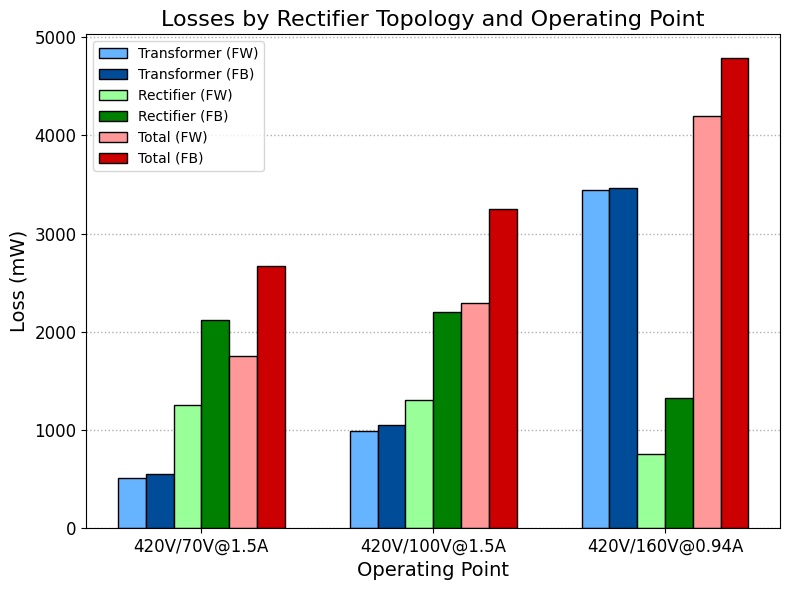

({'design': {'core': 'PQ 32/20',
   'Ve': 7.67e-06,
   'Ae': 0.0001542,
   'Aw': 8.078749999999999e-05,
   'Ab': 2.3550000000000003e-05,
   'AeAw_req': np.float64(2.9167740585309346e-09),
   'Np_turns': 39,
   'Ns_turns': 12,
   'd_strand': 0.0001,
   'Np_strands': 36,
   'Ns_strands': 43,
   'delta_skin': np.float64(0.00023111684453154825),
   'window_used': 7.13807481509046e-05,
   'window_max': 7.270875e-05,
   'St_p': np.float64(2.769197116525795e-07),
   'St_s': np.float64(3.317880202417113e-07)},
  'losses': [{'case': '420V/70V@1.5A',
    'winding_loss_mw': np.float64(209.4098479934363),
    'core_loss_mw': np.float64(295.98705880341123),
    'rectifier_loss_mw': np.float64(1250.6112623761935),
    'total_loss_mw': np.float64(1756.008169173041),
    'core_temp_c': np.float64(45.22106495458508)},
   {'case': '420V/100V@1.5A',
    'winding_loss_mw': np.float64(300.38976988126404),
    'core_loss_mw': np.float64(687.59746184994),
    'rectifier_loss_mw': np.float64(1304.217275773309

In [10]:
designer = MagneticDesigner(path_to_db_folder="SEPOC2025")


transformer_design_params = {
    'n': params['n'],
    'Kw': 0.9,      
    'J': 4.5e6,        
    'Bmax': 0.28,      
    'diode_temp': 80,   
    'vd_margin': 1.15,     
    'id_margin': 1.15,     
    'sort_by': 'vf'     
}

inductor_design_params = {
    'Ls': params['Ls'],
    'Kw': 1,
    'J': 4.5e6,
    'Bmax': 0.28
}

designer.display_comparison_report(
    tr_params=transformer_design_params,
    ls_params=inductor_design_params,
    operating_points=OperatingPoint,
    TimeStep=TimeStep
)


In [4]:
1.724e-8 * (1 + 0.00393*(40 - 20))

1.8595064000000003e-08